In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Making Linear Regression Model

In [9]:
class Linear_Regression:
    
    def __init__(self, learning_rate, no_of_iterations):
        
        self.learning_rate = learning_rate
        self.no_of_iterations = no_of_iterations
        

        
    def fit(self, X, Y):
        
        #number of training examples and features
        self.m, self.n = X.shape
        
        #initiating weight and bias
        self.w = np.zeros(self.n)
        self.b = 0
        self.X = X
        self.Y = Y
        
        #implementing gradient descent
        for i in range(self.no_of_iterations):
            self.update_weights()
    
    
    def update_weights(self, ):
        
        Y_prediction = self.predict(self.X)
        
        #calculating gradients
        dw = - (2 * (self.X.T).dot(self.Y - Y_prediction)) / self.m
        db = - 2 * np.sum(self.Y - Y_prediction) / self.m
        
        #updating the weights
        self.w = self.w - (self.learning_rate * dw)
        self.b = self.b - (self.learning_rate * db)
        
    
    def predict(self, X):
        
        return X.dot(self.w) + self.b

# Using it for prediction

In [10]:
dataset = pd.read_csv('salary_data.csv')
dataset.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [11]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 2)

In [13]:
model = Linear_Regression(learning_rate = 0.02, no_of_iterations = 1000)

model.fit(X_train, y_train)

In [14]:
#printing parameters
print('weight = ', model.w[0])
print('bias = ', model.b)

weight =  9514.400999035135
bias =  23697.406507136307


In [15]:
test_data_prediction = model.predict(X_test)
print(test_data_prediction)

[ 36066.12780588  34163.24760607  66512.21100279  58900.69020357
  91249.65360029  80783.81250135 101715.49469922  52240.60950424
  42726.20850521  88395.33330058]


# Visualization

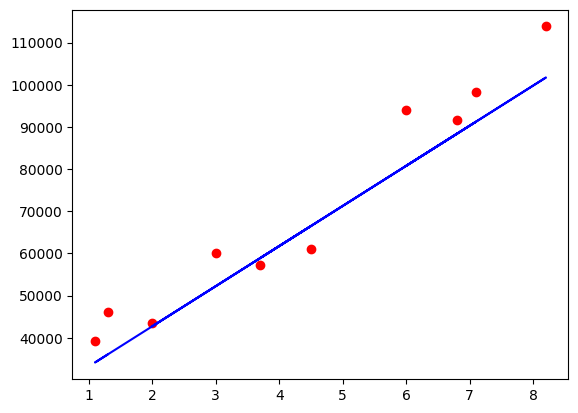

In [16]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_test, test_data_prediction, color = 'blue')
plt.show()

# DONE!